<a href="https://colab.research.google.com/github/Dipu1222/MLP-from-Scratch-Solving-the-XOR-Classification-Task/blob/main/MLP%20from%20Scratch%3A%20Solving%20the%20XOR%20Classification%20Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [15]:
np.random.seed(42)
W1 = np.random.randn(2, 2)
b1 = np.zeros((1, 2))
W2 = np.random.randn(2, 1)
b2 = np.zeros((1, 1))

In [16]:
lr = 0.1
iterations = 5000
for i in range(iterations):
    z1 = X @ W1 + b1
    a1 = 1 / (1 + np.exp(-z1))

    z2 = a1 @ W2 + b2
    a2 = 1 / (1 + np.exp(-z2))

    loss = np.mean((y - a2) ** 2)

    dz2 = (a2 - y) * (a2 * (1 - a2))
    dW2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)

    dz1 = dz2 @ W2.T * (a1 * (1 - a1))
    dW1 = X.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    W1 -= lr * dW1
    b1 -= lr * db1
    W2 -= lr * dW2
    b2 -= lr * db2

    if i % 500 == 0:
        print(f"Iteration {i}, Loss: {loss:.4f}")

Iteration 0, Loss: 0.2558
Iteration 500, Loss: 0.2498
Iteration 1000, Loss: 0.2494
Iteration 1500, Loss: 0.2484
Iteration 2000, Loss: 0.2454
Iteration 2500, Loss: 0.2342
Iteration 3000, Loss: 0.2047
Iteration 3500, Loss: 0.1720
Iteration 4000, Loss: 0.1532
Iteration 4500, Loss: 0.1438


In [17]:
z1 = X @ W1 + b1
a1 = 1 / (1 + np.exp(-z1))
z2 = a1 @ W2 + b2
y_scores = 1 / (1 + np.exp(-z2))
y_pred = (y_scores >= 0.5).astype(int)

In [18]:
tp = np.sum((y == 1) & (y_pred == 1))
tn = np.sum((y == 0) & (y_pred == 0))
fp = np.sum((y == 0) & (y_pred == 1))
fn = np.sum((y == 1) & (y_pred == 0))

accuracy = (tp + tn) / len(y)
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) != 0 else 0

thresholds = np.linspace(0, 1, 100)
tprs, fprs = [], []
for t in thresholds:
    y_temp = (y_scores >= t).astype(int)
    tp = np.sum((y == 1) & (y_temp == 1))
    fn = np.sum((y == 1) & (y_temp == 0))
    fp = np.sum((y == 0) & (y_temp == 1))
    tn = np.sum((y == 0) & (y_temp == 0))
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    tprs.append(tpr)
    fprs.append(fpr)
auc = np.trapz(tprs, fprs)

/tmp/ipython-input-4106486322.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(tprs, fprs)



=== Evaluation Metrics ===
Accuracy: 0.5000
Precision: 0.5000
Recall: 0.5000
F1-score: 0.5000
AUC: -0.7500


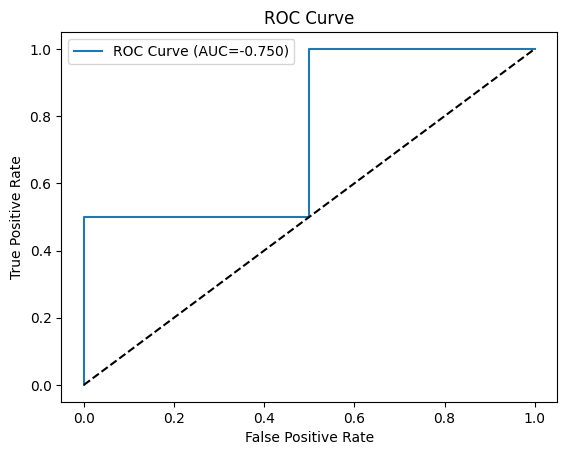

In [19]:
print("\n=== Evaluation Metrics ===")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

plt.plot(fprs, tprs, label=f"ROC Curve (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()